<a href="https://colab.research.google.com/github/kraken114/Colab/blob/main/3D_Deep_learning_1_pytorch_%D1%82%D1%80%D0%B5%D1%85%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D0%B5_%D0%BA%D0%BE%D0%BC%D0%BF%D1%8C%D1%8E%D1%82%D0%B5%D1%80%D0%BD%D0%BE%D0%B5_%D0%B7%D1%80%D0%B5%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/PacktPublishing/3D-Deep-Learning-with-Python/blob/main/chap2/data/cow_mesh/cow.mtl

# **Пример программирования 3D-отрисовки**

**1. Вначале необходимо импортировать все требующиеся модули Python:**

In [ ]:
%%capture
!pip install open3d
# блок установки pytorch3d
import os
import sys
import torch
need_pytorch3d=False
try:
    import pytorch3d
except ModuleNotFoundError:
    need_pytorch3d=True
if need_pytorch3d:
    if torch.__version__.startswith("2.2.") and sys.platform.startswith("linux"):
        # We try to install PyTorch3D via a released wheel.
        pyt_version_str=torch.__version__.split("+")[0].replace(".", "")
        version_str="".join([
            f"py3{sys.version_info.minor}_cu",
            torch.version.cuda.replace(".",""),
            f"_pyt{pyt_version_str}"
        ])
        !pip install fvcore iopath
        !pip install --no-index --no-cache-dir pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/{version_str}/download.html
    else:
        # We try to install PyTorch3D from source.
        !pip install 'git+https://github.com/facebookresearch/pytorch3d.git@stable'

In [ ]:
# import open3d
import os
import sys
import torch
import matplotlib.pyplot as plt

In [ ]:
%%capture
!wget https://graphics.stanford.edu/~mdfisher/Data/Meshes/bunny.obj
import numpy as np
import plotly.graph_objects as go
import open3d
from pytorch3d.io import load_ply

In [ ]:
# https://linkhs.github.io/Colab/Open3D/Open3D_visualization.html
def draw_geometries(geometries):
    graph_objects = []

    for geometry in geometries:
        geometry_type = geometry.get_geometry_type()

        if geometry_type == open3d.geometry.Geometry.Type.PointCloud:
            points = np.asarray(geometry.points)
            colors = None
            if geometry.has_colors():
                colors = np.asarray(geometry.colors)
            elif geometry.has_normals():
                colors = (0.5, 0.5, 0.5) + np.asarray(geometry.normals) * 0.5
            else:
                geometry.paint_uniform_color((1.0, 0.0, 0.0))
                colors = np.asarray(geometry.colors)

            scatter_3d = go.Scatter3d(x=points[:,0], y=points[:,1], z=points[:,2], mode='markers', marker=dict(size=1, color=colors))
            graph_objects.append(scatter_3d)

        if geometry_type == open3d.geometry.Geometry.Type.TriangleMesh:
            triangles = np.asarray(geometry.triangles)
            vertices = np.asarray(geometry.vertices)
            colors = None
            if geometry.has_triangle_normals():
                colors = (0.5, 0.5, 0.5) + np.asarray(geometry.triangle_normals) * 0.5
                colors = tuple(map(tuple, colors))
            else:
                colors = (1.0, 0.0, 0.0)

            mesh_3d = go.Mesh3d(x=vertices[:,0], y=vertices[:,1], z=vertices[:,2], i=triangles[:,0], j=triangles[:,1], k=triangles[:,2], facecolor=colors, opacity=0.50)
            graph_objects.append(mesh_3d)

    fig = go.Figure(
        data=graph_objects,
        layout=dict(
            scene=dict(
                xaxis=dict(visible=False),
                yaxis=dict(visible=False),
                zaxis=dict(visible=False)
            )
        )
    )
    fig.show()

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
# Функция-утилита для загрузки полигональных сеток
from pytorch3d.io import load_objs_as_meshes

In [ ]:
# Структуры данных и функции для отрисовки
from pytorch3d.renderer import (
look_at_view_transform,
PerspectiveCameras,
PerspectiveCameras,
PointLights,
Materials,
RasterizationSettings,
MeshRenderer,
MeshRasterizer
)
from pytorch3d.renderer.mesh.shader import HardPhongShader
sys.path.append(os.path.abspath(''))

**2. Затем загружаем используемую в примере полигональную сетку. OBJ-**
**файл cow.obj содержит сеточную модель объекта игрушечной коровы:**

In [ ]:
# Задать пути
DATA_DIR = "/content/data"
obj_filename = os.path.join(DATA_DIR, "/content/data/cow.obj")
# device = torch.device('cuda')
# Загрузить OBJ-файл
mesh = load_objs_as_meshes([obj_filename])#, device=device)

In [ ]:
# это с cudой
# R, T = look_at_view_transform(2.7, 0, 180)
# cameras = PerspectiveCameras(device=device, R=R, T=T)
# lights = PointLights(device=device, location=[[0.0, 0.0, -3.0]])

In [ ]:
R, T = look_at_view_transform(2.7, 0, 180)
cameras = PerspectiveCameras( R=R, T=T)
lights = PointLights( location=[[0.0, 0.0, -3.0]])

In [ ]:
# это с cudой
# raster_settings = RasterizationSettings(
# image_size=512,
# blur_radius=0.0,
# faces_per_pixel=1,
# )
# renderer = MeshRenderer(
# rasterizer=MeshRasterizer(
# cameras=cameras,
# raster_settings=raster_settings
# ),
# shader = HardPhongShader(
# device=device,
# cameras=cameras,
# lights=lights
# )
# )

In [ ]:
raster_settings = RasterizationSettings(
image_size=512,
blur_radius=0.0,
faces_per_pixel=1,
)
renderer = MeshRenderer(
rasterizer=MeshRasterizer(
cameras=cameras,
raster_settings=raster_settings
),
shader = HardPhongShader(

cameras=cameras,
lights=lights
)
)

In [ ]:
# это с cudой
# lights.location = torch.tensor([0.0, 0.0, +1.0],device=device)[None]
# images = renderer(mesh)
# plt.figure(figsize=(10, 10))
# plt.imshow(images[0, ..., :3].cpu().numpy())
# plt.axis("off")
# plt.savefig('light_at_front.png')
# plt.show()

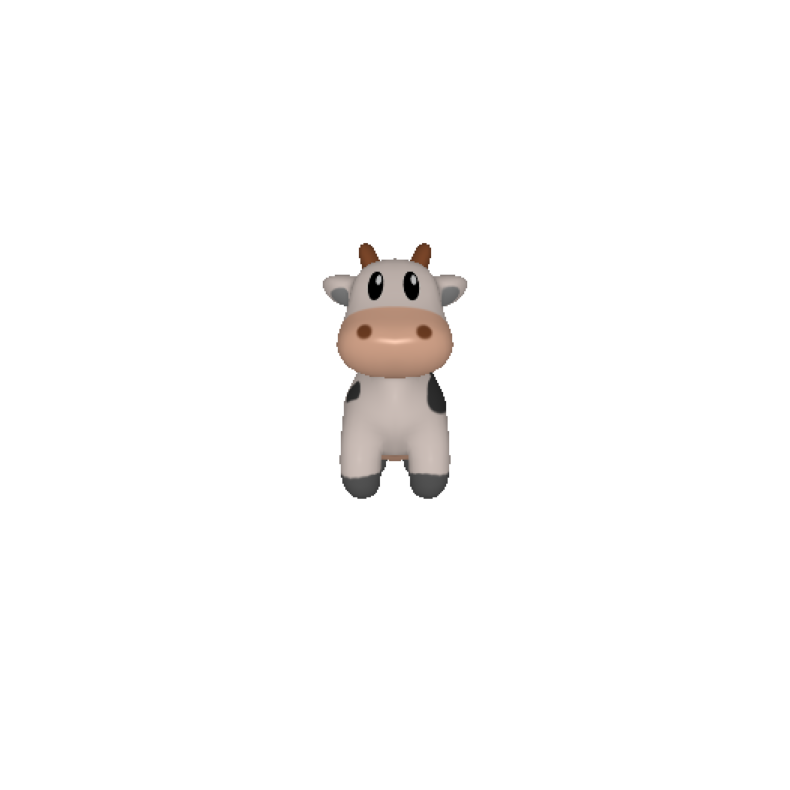

In [ ]:
# lights.location = torch.tensor([0.0, 0.0, +1.0])[None]
images = renderer(mesh)
plt.figure(figsize=(10, 10))
plt.imshow(images[0, ..., :3].numpy())
plt.axis("off")
plt.savefig('light_at_front.png')
plt.show()

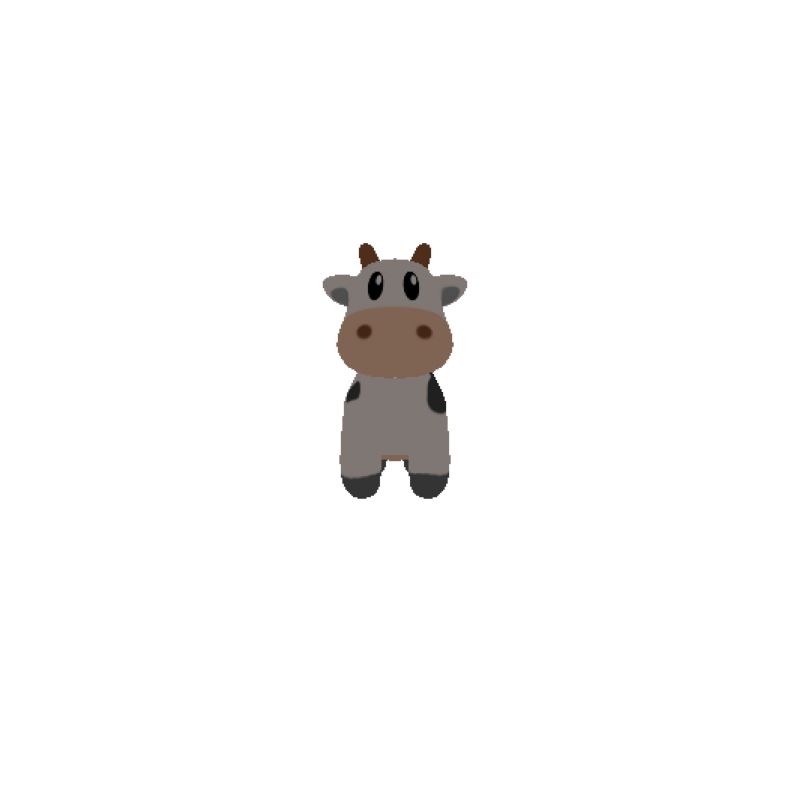

In [ ]:
lights.location = torch.tensor([0.0, 0.0, +1.0])[None]
images = renderer(mesh, lights=lights, )
plt.figure(figsize=(10, 10))
plt.imshow(images[0, ..., :3].numpy())
plt.axis("off")
plt.savefig('light_at_back.png')
plt.show()

In [ ]:
# # это с cudой
# # Задать зеркальный цвет, блеск материала и
# # цвет окружающих компонент
# materials = Materials(
# device=device,
# specular_color=[[0.0, 1.0, 0.0]],
# shininess=10.0,
# ambient_color=((0.01, 0.01, 0.01),),
# )
# images = renderer(mesh, lights=lights, materials=materials)
# plt.figure(figsize=(10, 10))
# plt.imshow(images[0, ..., :3].cpu().numpy())
# plt.axis("off")
# plt.savefig('dark.png')
# plt.show()

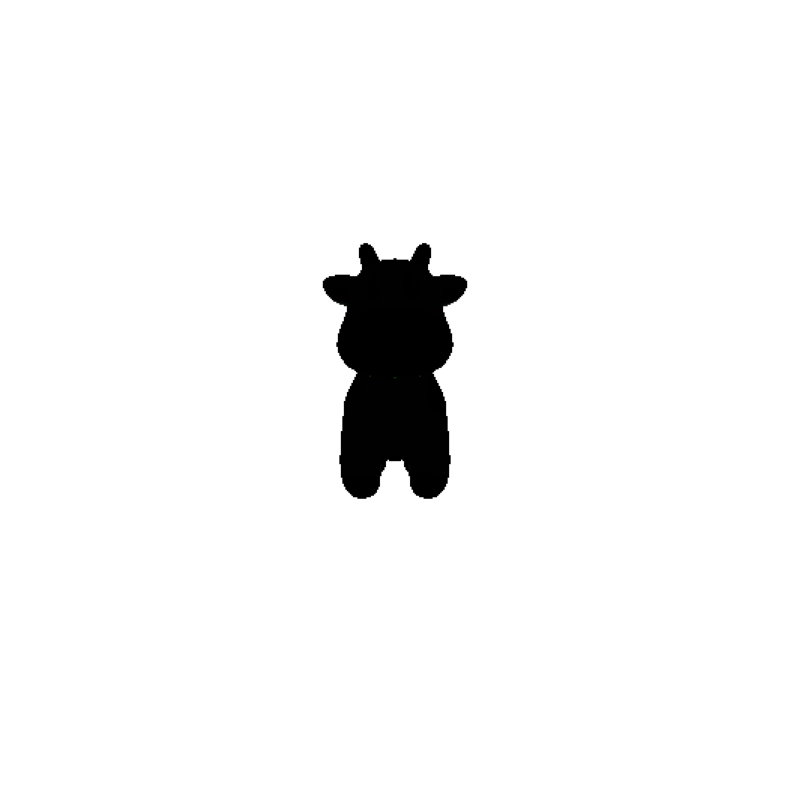

In [ ]:
# это с cudой
# Задать зеркальный цвет, блеск материала и
# цвет окружающих компонент
materials = Materials(
specular_color=[[0.0, 1.0, 0.0]],
shininess=10.0,
ambient_color=((0.01, 0.01, 0.01),),
)
images = renderer(mesh, lights=lights, materials=materials)
plt.figure(figsize=(10, 10))
plt.imshow(images[0, ..., :3].numpy())
plt.axis("off")
plt.savefig('dark.png')
plt.show()

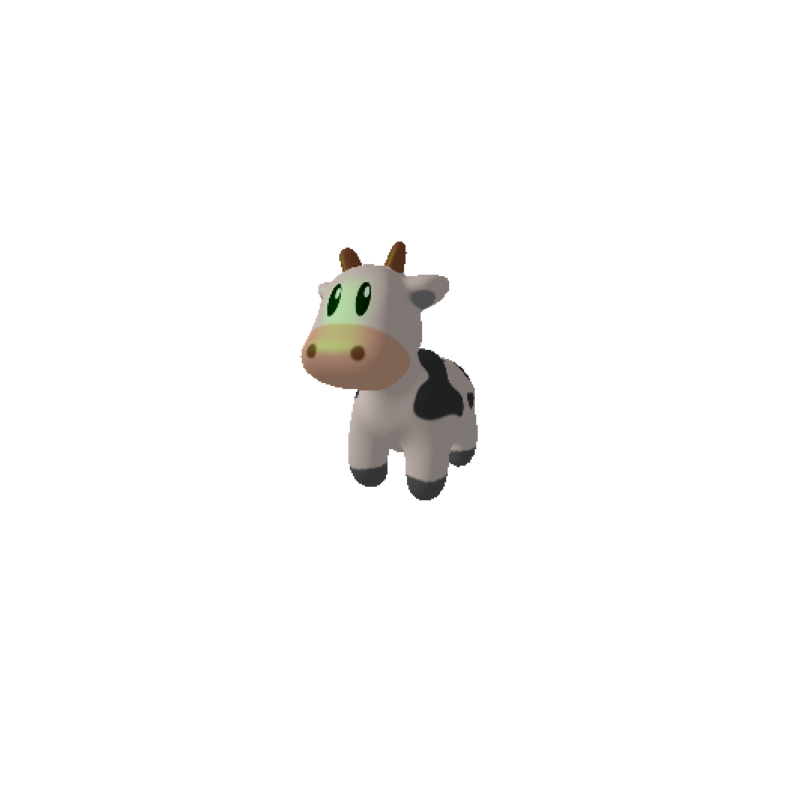

In [ ]:
R, T = look_at_view_transform(dist=2.7, elev=10, azim=-150)
cameras = PerspectiveCameras( R=R, T=T)
lights.location = torch.tensor([[2.0, 2.0, -2.0]])#, device=device)
# Изменить зеркальный цвет на зеленый и
# изменить блеск материала
materials = Materials(
specular_color=[[0.0, 1.0, 0.0]],
shininess=10.0
)
# Повторить отрисовку полигональной сетки,
# передав именованные аргументы для измененных компонент.
images = renderer(mesh, lights=lights,
materials=materials, cameras=cameras)
plt.figure(figsize=(10, 10))
plt.imshow(images[0, ..., :3].numpy())
plt.axis("off")
plt.savefig('green.png')
plt.show()

# **Пример программирования разнородных мини-пакетов**

In [ ]:
import os
import torch
from pytorch3d.io import load_objs_as_meshes
from pytorch3d.structures.meshes import join_meshes_as_batch
from pytorch3d.ops import sample_points_from_meshes
from pytorch3d.loss import chamfer_distance
import numpy as np

In [ ]:
if torch.cuda.is_available():
  device = torch.device("cuda:0")
else:
  device = torch.device("cpu")
  print("ПРЕДУПРЕЖДЕНИЕ: только CPU, очень медленно!")

ПРЕДУПРЕЖДЕНИЕ: только CPU, очень медленно!


In [ ]:
/content/bunny.obj

In [ ]:
mesh_names = ['cube.obj', 'diamond.obj', 'dodecahedron.obj']
data_path = '/content/'
for mesh_name in mesh_names:
  mesh = open3d.io.read_triangle_mesh(os.path.join(data_path, mesh_name))
  open3d.visualization.draw_geometries([mesh],
  mesh_show_wireframe=True,
  mesh_show_back_face=True)

In [ ]:
mesh_names = ['cube.obj', 'diamond.obj', 'dodecahedron.obj']
data_path = '/content/'
for mesh_name in mesh_names:
  mesh = open3d.io.read_triangle_mesh(os.path.join(data_path, mesh_name))
  if mesh.is_empty(): exit()
  triangles = np.asarray(mesh.triangles)
  vertices = np.asarray(mesh.vertices)
  colors = None
  if mesh.has_triangle_normals():
      colors = (0.5, 0.5, 0.5) + np.asarray(mesh.triangle_normals) * 0.5
      colors = tuple(map(tuple, colors))
  else:
      colors = (1.0, 0.0, 0.0)

  fig = go.Figure(
      data=[
          go.Mesh3d(
              x=vertices[:,0],
              y=vertices[:,1],
              z=vertices[:,2],
              i=triangles[:,0],
              j=triangles[:,1],
              k=triangles[:,2],
              facecolor=colors,
              opacity=0.50)
      ],
      layout=dict(
          scene=dict(
              xaxis=dict(visible=False),
              yaxis=dict(visible=False),
              zaxis=dict(visible=False)
          )
      )
  )
  fig.show()

In [ ]:
mesh_names = ['cube.obj', 'diamond.obj', 'dodecahedron.obj']
data_path = '/content/'
mesh_list = list()
device = torch.device('cuda')
for mesh_name in mesh_names:
  mesh = load_objs_as_meshes([os.path.join(data_path, mesh_name)])
  print(mesh)
  mesh_list.append(mesh)

/usr/local/lib/python3.10/dist-packages/pytorch3d/io/obj_io.py:548: UserWarning:

Mtl file does not exist: /content/./cube.mtl

/usr/local/lib/python3.10/dist-packages/pytorch3d/io/obj_io.py:544: UserWarning:

No mtl file provided



In [ ]:
# используем PyTorch3D, чтобы загрузить те же полигональные
# сетки и построить список полигональных сеток, назначив его пере-
# менной mesh_list:
mesh_names = ['cube.obj', 'diamond.obj', 'dodecahedron.obj']
data_path = '/content/'
mesh_list = list()
device = torch.device('cuda')
for mesh_name in mesh_names:
  mesh = load_objs_as_meshes([os.path.join(data_path, mesh_name)])
  mesh_list.append(mesh)
  print([os.path.join(data_path, mesh_name)])

['/content/cube.obj']
['/content/diamond.obj']
['/content/dodecahedron.obj']


In [ ]:
# возвращает минипакет полигональных сеток
mesh_batch = join_meshes_as_batch(mesh_list, include_textures=False)



---



In [ ]:
# батч в списковом формате стр.61
vertex_list = mesh_batch.verts_list()
print('vertex_list = ', vertex_list)
face_list = mesh_batch.faces_list()
print('face_list = ', face_list)

In [ ]:
# батч в дополненном формате стр.61
vertex_padded = mesh_batch.verts_padded()
print('vertex_padded = ', vertex_padded)
face_padded = mesh_batch.faces_padded()
print('face_padded = ', face_padded)

In [ ]:
# батч в упакованном формате стр.61
vertex_packed = mesh_batch.verts_packed()
print('vertex_packed = ', vertex_packed)
face_packed = mesh_batch.faces_packed()
print('face_packed = ', face_packed)
num_vertices = vertex_packed.shape[0]
print('num_vertices = ', num_vertices)



---



In [ ]:
# клон достоверных сеточных моделей:
mesh_batch_noisy = mesh_batch.clone()

In [ ]:
# Затем мы определяем переменную motion_gt, которая будет представ-
# лять смещение между местоположением камеры и начальной точкой:
motion_gt = np.array([3, 4, 5])
motion_gt = torch.as_tensor(motion_gt)
print('достоверные данные перемещения = ', motion_gt)
motion_gt = motion_gt[None, :]
motion_gt = motion_gt#.to(device)

достоверные данные перемещения =  tensor([3, 4, 5])


In [ ]:
# Для выполнения симуляции шумных мерных данных камеры глубины
# мы генерируем случайный гауссов шум со средним значением, равным
# motion_gt. Шумы добавляются в mesh_batch_noisy с помощью функции
# PyTorch3D offset_verts:

noise = (0.1**0.5)*torch.randn(
mesh_batch_noisy.verts_packed().shape)#.to(device)
motion_gt = np.array([3, 4, 5])
motion_gt = torch.as_tensor(motion_gt)
noise = noise + motion_gt
mesh_batch_noisy = mesh_batch_noisy.offset_verts(noise).detach()

In [ ]:
mesh_batch_noisy

In [ ]:
motion_estimate = torch.zeros(motion_gt.shape,
# device=device,
requires_grad=True)

In [ ]:
optimizer = torch.optim.SGD([motion_estimate], lr=0.1,momentum=0.9)

In [ ]:
for i in range(0, 200):
  optimizer.zero_grad()
  current_mesh_batch = mesh_batch.offset_verts(
    motion_estimate.repeat(num_vertices,1))
  sample_trg = sample_points_from_meshes(current_mesh_batch, 5000)
  sample_src = sample_points_from_meshes(mesh_batch_noisy, 5000)
  loss, _ = chamfer_distance(sample_trg, sample_src)
  loss.backward()
  optimizer.step()
  print('i = ', i, ', motion_estimation = ', motion_estimate)

i =  0 , motion_estimation =  tensor([0.8375, 1.1132, 1.2774], requires_grad=True)
i =  1 , motion_estimation =  tensor([2.1699, 2.8925, 3.3427], requires_grad=True)
i =  2 , motion_estimation =  tensor([3.5420, 4.7151, 5.5264], requires_grad=True)
i =  3 , motion_estimation =  tensor([4.6775, 6.2400, 7.4318], requires_grad=True)
i =  4 , motion_estimation =  tensor([5.2386, 7.0348, 8.6109], requires_grad=True)
i =  5 , motion_estimation =  tensor([5.0941, 6.9279, 8.7979], requires_grad=True)
i =  6 , motion_estimation =  tensor([4.3571, 6.0412, 8.0453], requires_grad=True)
i =  7 , motion_estimation =  tensor([3.3129, 4.7258, 6.6659], requires_grad=True)
i =  8 , motion_estimation =  tensor([2.2876, 3.4147, 5.1304], requires_grad=True)
i =  9 , motion_estimation =  tensor([1.4682, 2.3196, 3.7373], requires_grad=True)
i =  10 , motion_estimation =  tensor([1.0630, 1.7189, 2.7441], requires_grad=True)
i =  11 , motion_estimation =  tensor([1.1739, 1.7541, 2.3758], requires_grad=True)
i 

# **Примеры программирования трансформации**
# **и поворота**

In [ ]:
import torch
from pytorch3d.transforms.so3 import (so3_exp_map,
                                      so3_log_map,
                                      hat_inv, hat)

In [ ]:
if torch.cuda.is_available():
  device = torch.device("cuda:0")
else:
  device = torch.device("cpu")
  print("ПРЕДУПРЕЖДЕНИЕ: только CPU, очень медленно!")

ПРЕДУПРЕЖДЕНИЕ: только CPU, очень медленно!


In [ ]:
log_rot = torch.zeros([4, 3], device = device)
log_rot[0, 0] = 0.001
log_rot[0, 1] = 0.0001
log_rot[0, 2] = 0.0002
log_rot[1, 0] = 0.0001
log_rot[1, 1] = 0.001
log_rot[1, 2] = 0.0002
log_rot[2, 0] = 0.0001
log_rot[2, 1] = 0.0002
log_rot[2, 2] = 0.001
log_rot[3, 0] = 0.001
log_rot[3, 1] = 0.002
log_rot[3, 2] = 0.003

In [ ]:
log_rot_hat = hat(log_rot)
print('log_rot_hat shape = ', log_rot_hat.shape)
print('log_rot_hat = ', log_rot_hat)

log_rot_hat shape =  torch.Size([4, 3, 3])
log_rot_hat =  tensor([[[ 0.0000e+00, -2.0000e-04,  1.0000e-04],
         [ 2.0000e-04,  0.0000e+00, -1.0000e-03],
         [-1.0000e-04,  1.0000e-03,  0.0000e+00]],

        [[ 0.0000e+00, -2.0000e-04,  1.0000e-03],
         [ 2.0000e-04,  0.0000e+00, -1.0000e-04],
         [-1.0000e-03,  1.0000e-04,  0.0000e+00]],

        [[ 0.0000e+00, -1.0000e-03,  2.0000e-04],
         [ 1.0000e-03,  0.0000e+00, -1.0000e-04],
         [-2.0000e-04,  1.0000e-04,  0.0000e+00]],

        [[ 0.0000e+00, -3.0000e-03,  2.0000e-03],
         [ 3.0000e-03,  0.0000e+00, -1.0000e-03],
         [-2.0000e-03,  1.0000e-03,  0.0000e+00]]])


In [ ]:
log_rot_copy = hat_inv(log_rot_hat)
print('log_rot_copy shape = ', log_rot_copy.shape)
print('log_rot_copy = ', log_rot_copy)

log_rot_copy shape =  torch.Size([4, 3])
log_rot_copy =  tensor([[1.0000e-03, 1.0000e-04, 2.0000e-04],
        [1.0000e-04, 1.0000e-03, 2.0000e-04],
        [1.0000e-04, 2.0000e-04, 1.0000e-03],
        [1.0000e-03, 2.0000e-03, 3.0000e-03]])


In [ ]:
rotation_matrices = so3_exp_map(log_rot)
print('rotation_matrices = ', rotation_matrices)

rotation_matrices =  tensor([[[ 1.0000e+00, -1.9995e-04,  1.0010e-04],
         [ 2.0005e-04,  1.0000e+00, -9.9999e-04],
         [-9.9900e-05,  1.0000e-03,  1.0000e+00]],

        [[ 1.0000e+00, -1.9995e-04,  1.0000e-03],
         [ 2.0005e-04,  1.0000e+00, -9.9900e-05],
         [-9.9999e-04,  1.0010e-04,  1.0000e+00]],

        [[ 1.0000e+00, -9.9999e-04,  2.0005e-04],
         [ 1.0000e-03,  1.0000e+00, -9.9900e-05],
         [-1.9995e-04,  1.0010e-04,  1.0000e+00]],

        [[ 9.9999e-01, -2.9990e-03,  2.0015e-03],
         [ 3.0010e-03,  9.9999e-01, -9.9700e-04],
         [-1.9985e-03,  1.0030e-03,  1.0000e+00]]])


In [ ]:
log_rot_again = so3_log_map(rotation_matrices)
print('log_rot_again = ', log_rot_again)

log_rot_again =  tensor([[1.0000e-03, 1.0000e-04, 2.0000e-04],
        [1.0000e-04, 1.0000e-03, 2.0000e-04],
        [1.0000e-04, 2.0000e-04, 1.0000e-03],
        [1.0000e-03, 2.0000e-03, 3.0000e-03]])
